In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sports-imgs-examples/swimming.jpg
/kaggle/input/sports-imgs-examples/cricket.jpg
/kaggle/input/sports-imgs-examples/badminton.jpg
/kaggle/input/sports-images/swimming.jpg
/kaggle/input/sports-images/cricket.jpg
/kaggle/input/sports-images/badminton.jpg


In [5]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -U fastai ddgs primp fasttransform --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.1/235.1 kB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 51.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.19
    Uninstalling fastai-2.7.19:
      Successfully uninstalled fastai-2.7.19


In [6]:
# this function will help us get the url for the images
from ddgs import DDGS  
from fastcore.all import *

def search_images(keywords, max_images=200): 
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [7]:
# look at some images
images = 3
urls = search_images('badminton player', max_images=images)
for i in range(images):
    print(urls[i])    

https://stillmed.olympics.com/media/Images/OlympicOrg/News/2018/05/2018-05-09-Saina-Nehwal-thumbnail.jpg
https://images.news18.com/ibnlive/uploads/2022/01/saina-nehwal-1.jpg
https://cdn.britannica.com/01/256401-050-2FD8510B/india-saina-nehwal-during-womens-singles-against-wang-zhiyi-of-china-at-badminton-asia-championships.jpg


In [8]:
# lets define our search space
searches = [
    "soccer football player action photo", 
    "basketball player dunking photo", 
    "tennis player serving photo", 
    "cricket batsman batting match", 
    "baseball pitcher throwing action", 
    "rugby player tackling match", 
    "golf player swinging", 
    "boxing fighter in ring photo", 
    "swimming athlete in pool freestyle", 
    "gymnastics athlete performing floor routine",
    "badminton player serving"
]



path = Path('sports_classification')

In [19]:
from fastdownload import download_url
from fastai.vision.all import *
import time

for pattern in searches:
    folder_name = pattern.replace(" ", "_").replace("-", "_")
    dest = (path/folder_name)
    dest.mkdir(exist_ok=True, parents=True)
    
    print(f"Downloading images for: {pattern}")
    download_images(dest, urls=search_images(pattern, max_images=100))  # ~100 per class
    time.sleep(5)
    
    # Resize to keep them uniform
    resize_images(dest, max_size=400, dest=dest)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  war

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


In [20]:
# unlink failed images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


144

In [21]:
len(get_image_files(path))

1758

In [22]:
# Import all non-standard modules used in your training (crucial for unpickling)
import numpy as np 
from ddgs import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
import time
import shutil

# 1. Re-create your DataLoaders (dls) to ensure vocab is current
path = Path('sports_classification')
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 1),
    get_y = parent_label,
    item_tfms = [Resize(224, method = 'squish')]
).dataloaders(path, bs=32)

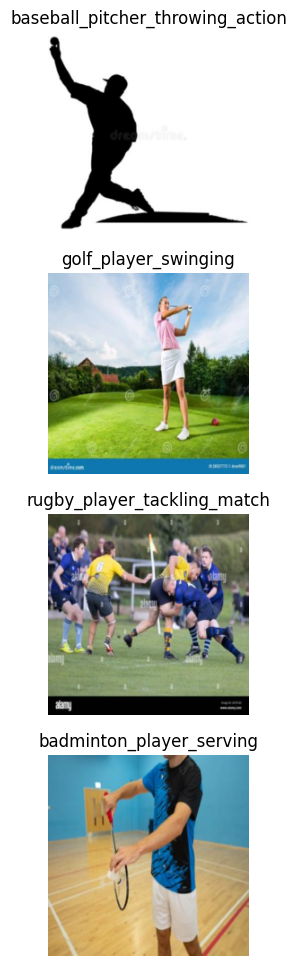

In [23]:
# see some images
dls.show_batch(max_n = 4, nrows = 4)

In [24]:
# although the images are not very clean, we can still train the model with them believing it will pickup the key details in them that matters
learn = vision_learner(dls, resnet34, metrics = accuracy)
learn.fine_tune(7)

epoch,train_loss,valid_loss,accuracy,time
0,1.837803,0.372820,0.888889,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.345589,0.105402,0.977208,00:08
1,0.203653,0.069837,0.971510,00:08
2,0.113197,0.030088,0.988604,00:08
3,0.071355,0.023989,0.994302,00:08
4,0.040262,0.036823,0.985755,00:09
5,0.021000,0.027722,0.994302,00:09
6,0.012941,0.027460,0.994302,00:08


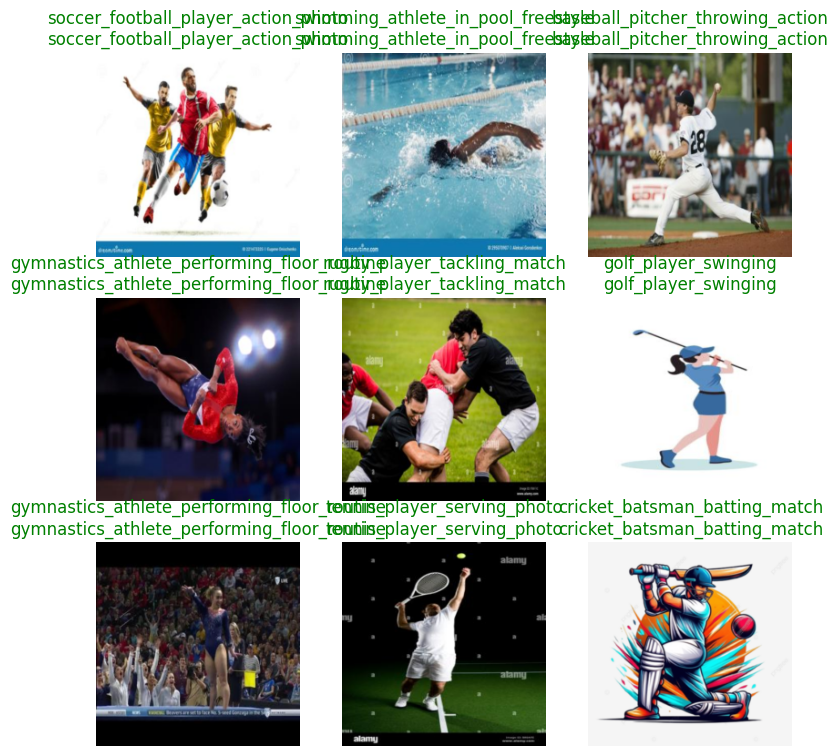

In [25]:
learn.show_results()

In [26]:
# works good on test images
# accuracy near about 99% :)

In [27]:
# 3. Final, clean export
learn.path = Path('.')
learn.export('export.pkl')

# Re-load the existing model and re-export it cleanly
learn = load_learner('export.pkl')

print("Model re-exported cleanly as export.pkl. Now ready for deployment.")

Model re-exported cleanly as export.pkl. Now ready for deployment.


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [28]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [29]:
import gradio as gr

# Assuming 'predict' function is defined and 'learn' is a FastAI learner
# The 'shape' argument is redundant if you're resizing in your 'predict' function
# and typically unnecessary for image inputs unless you need cropping/padding control.
# If you are passing a PIL Image from Gradio to predict, you can simply use:
# inputs=gr.Image(type="pil")

gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3)
).launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://16cdc2888cf942aa51.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [30]:
# get all the images in the cwd from sports-images dataset
!cp -r /kaggle/input/sports-images/* .

In [31]:
title = "Sports Classifier"
description = "A sports classifier trained on the images from Google. Created as a demo for Gradio and HuggingFace Spaces."
article="<p style='text-align: center'><a href='www.linkedin.com/in/shivamkswarnkar' target='_blank'>Linkedin Profile</a></p>"
enable_queue=True
examples = ["badminton.jpg", "cricket.jpg", "swimming.jpg"]

In [32]:
gr.Interface(fn=predict,
             inputs=gr.Image(type="pil"),
             outputs=gr.Label(num_top_classes=3),
             title=title,
             description=description,
             article=article,
             examples=examples).launch(share=True)

* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://d2b3e5f5813f1e3f6f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [36]:
# =========================================================
# 1. VERIFY MODEL AND SETUP MINIMAL FILES
# =========================================================
from fastai.vision.all import *

# --- VERIFICATION STEP (Optional but Recommended) ---
# This ensures your model loads correctly *in the current environment*
try:
    learn_check = load_learner('export.pkl') 
    print("Local Model Check: export.pkl loaded successfully.")
    print("Labels found:", learn_check.dls.vocab)
except Exception as e:
    print(f"Local Model Check Failed. This may indicate an issue with the saved file itself. Error: {e}")


# --- 2. Create Minimal Deployment Files ---

# CRITICAL: This is the ONLY configuration file we need, and it fixes the core TypeError.
readme_content = """
---
title: Sports Classifier
emoji: 🏀
sdk: gradio
python_version: 3.11 
---
"""
with open("README.md", "w") as f:
    f.write(readme_content)


# Minimal dependencies, including the necessary custom ones (fasttransform)
requirements_content = """
fastai==2.7.12
torch<2.2
torchvision<0.16
numpy<2.0
gradio
cloudpickle 
fasttransform 
"""
with open("requirements.txt", "w") as f:
    f.write(requirements_content)


# Minimal app.py based on your successful template
app_code = f"""
import gradio as gr
from fastai.vision.all import *
import os

try:
    learn = load_learner('model.pkl') 
except Exception as e:
    print(f"Error loading model.pkl: {{e}}")
    raise

labels = learn.dls.vocab

def predict(img):
    img = PILImage.create(img)
    pred, pred_idx, probs = learn.predict(img) 
    return {{labels[i]: float(probs[i]) for i in range(len(labels))}}

title = "Sports Classifier"
description = "A sports classifier trained on the images from Google. Created as a demo for Gradio and HuggingFace Spaces."
article="<p style='text-align: center'><a href='www.linkedin.com/in/shivamkswarnkar' target='_blank'>Linkedin Profile</a></p>"
examples = ["badminton.jpg", "cricket.jpg", "swimming.jpg"] 

demo = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3),
    title=title,
    description=description,
    examples=examples
)

if __name__ == "__main__":
    demo.launch()
"""
with open("app.py", "w") as f:
    f.write(app_code)

print("Deployment files (app.py, requirements.txt, README.md) created/updated.")

Local Model Check: export.pkl loaded successfully.
Labels found: ['badminton_player_serving', 'baseball_pitcher_throwing_action', 'basketball_player_dunking_photo', 'boxing_fighter_in_ring_photo', 'cricket_batsman_batting_match', 'golf_player_swinging', 'gymnastics_athlete_performing_floor_routine', 'rugby_player_tackling_match', 'soccer_football_player_action_photo', 'swimming_athlete_in_pool_freestyle', 'tennis_player_serving_photo']
Deployment files (app.py, requirements.txt, README.md) created/updated.


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [34]:
# Authenticate to Hugging Face
from huggingface_hub import notebook_login, HfApi

# This is still the best way to get the token into the notebook session
notebook_login()

In [37]:
# ===========================================================
# FINAL, MINIMAL, COMPLETE DEPLOYMENT SCRIPT
# This script handles cleaning, LFS tracking, and pushing.
# ===========================================================
from huggingface_hub import Repository
import os

# --- CONFIGURATION (Change only the SPACE_ID for a new project) ---
SPACE_ID = "sks01dev/Sports_Classifier"
LOCAL_DIR = "hf_space_clone"
MODEL_FILE = "export.pkl"
EXAMPLE_IMAGES_PATH = "/kaggle/input/sports-images" # Your known source path
TARGET_IMAGE_NAMES = ["badminton.jpg", "cricket.jpg", "swimming.jpg"]


os.chdir("/kaggle/working/")

# --- STEP 1: CLEAN AND RESET REPO ---
print("--- Cleaning and Resetting Repository ---")
!rm -rf {LOCAL_DIR}

repo = Repository(
    local_dir=LOCAL_DIR,
    clone_from=f"https://huggingface.co/spaces/{SPACE_ID}",
    repo_type="space",
    use_auth_token=True
)
os.chdir(LOCAL_DIR)

!git fetch origin main
!git reset --hard origin/main
!git clean -fdx 
print("Repo cleaned and reset.")
os.chdir("..")


# --- STEP 2: COPY FILES AND PUSH ---
print("\n--- Copying Files and Pushing ---")
os.chdir(LOCAL_DIR)

# Copy configuration and code
!cp ../app.py .
!cp ../requirements.txt .
!cp ../README.md .

# Copy and rename the model file
!cp ../{MODEL_FILE} model.pkl

# Copy example images (uses the known input path)
for img_name in TARGET_IMAGE_NAMES:
    !cp {EXAMPLE_IMAGES_PATH}/{img_name} .

# Configure Git LFS and push
!git lfs install
!git lfs track "*.pkl" "*.jpg" "*.png"
!git add .gitattributes
!git add .
!git commit -m "FINAL PUSH: Locked environment (Python 3.11) and stable dependencies."
!git push --force

os.chdir("..")
print(f"\nDeployment complete! Space rebuilding at: https://huggingface.co/spaces/{SPACE_ID}")

--- Cleaning and Resetting Repository ---


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
Cloning https://huggingface.co/spaces/sks01dev/Sports_Classifier into local empty directory.


Download file export.pkl:   0%|          | 8.00k/83.5M [00:00<?, ?B/s]

Download file badminton.jpg:  17%|#6        | 32.0k/193k [00:00<?, ?B/s]

Download file swimming.jpg:  22%|##2       | 32.0k/144k [00:00<?, ?B/s]

Download file cricket.jpg:  11%|#         | 32.0k/303k [00:00<?, ?B/s]

Download file model.pkl:   0%|          | 22.9k/83.5M [00:00<?, ?B/s]

Clean file badminton.jpg:   1%|          | 1.00k/193k [00:00<?, ?B/s]

Clean file swimming.jpg:   1%|          | 1.00k/144k [00:00<?, ?B/s]

Clean file cricket.jpg:   0%|          | 1.00k/303k [00:00<?, ?B/s]

Clean file export.pkl:   0%|          | 1.00k/83.5M [00:00<?, ?B/s]

Clean file model.pkl:   0%|          | 1.00k/83.5M [00:00<?, ?B/s]

From https://huggingface.co/spaces/sks01dev/Sports_Classifier
 * branch            main       -> FETCH_HEAD
HEAD is now at f19ece8 🚀 FINAL PUSH: Locked environment (Python 3.11) and stable dependencies.
Repo cleaned and reset.

--- Copying Files and Pushing ---
Updated git hooks.
Git LFS initialized.
"*.pkl" already supported
"*.jpg" already supported
"*.png" already supported
[main 22ff73a] FINAL PUSH: Locked environment (Python 3.11) and stable dependencies.
 1 file changed, 2 insertions(+), 1 deletion(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 4 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 559 bytes | 559.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
To https://huggingface.co/spaces/sks01dev/Sports_Classifier
   f19ece8..22ff73a  main -> main

Deployment complete! Space rebuilding at: https://huggingface.co/spaces/sks01dev/Sports_Classifier
